# Read TESEO's domain files

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IHCantabria/pyteseo/blob/main/docs/notebooks/01_read_domain.ipynb)

## Install pyTESEO
- If you are running this notebook from `Google colab` uncomment and run `!pip install pyteseo && pyteseo-tests` in the cell below. 
Doing this you will install `pyteseo` from `pypi` repository and run `pyteseo-tests` to check the installation (all tests have to succeed).

- If you are using this notebook in your own local machine you need to install the library from the local repo `pip install .` or pypi `pip install pyteseo`.

In [1]:
# !pip install pyteseo && pyteseo-tests

In [2]:
import warnings

warnings.simplefilter(action="ignore")

## Read TESEO's domain files (coastline and grid) and plot them.

1. Define paths

In [3]:
from pathlib import Path


# path where example data needed by the use case is located
import pyteseo.tests as tests_

data_path = Path(tests_.__file__).parent / "data"

grid_path = data_path / "grid.dat"
coastline_path = data_path / "coastline.dat"

2. Read bathymetry and coastline from TESEO's format files

In [4]:
from pyteseo.io.domain import read_grid, read_coastline

grid = read_grid(grid_path, nan_value=-9999)
coast = read_coastline(coastline_path)

3. Select one polygon of the coastline by its index

In [5]:
i = 3
coast.loc[[i]].head(3)

lon        lat
polygon point                     
3       14415       NaN        NaN
        14416 -3.730684  43.475636
        14417 -3.730706  43.475614

4. Plot bathymetry, coastline and the selected polygon (in red)

(-3.878859987333, -3.6949486337070003, 43.363319567585, 43.524003830115)

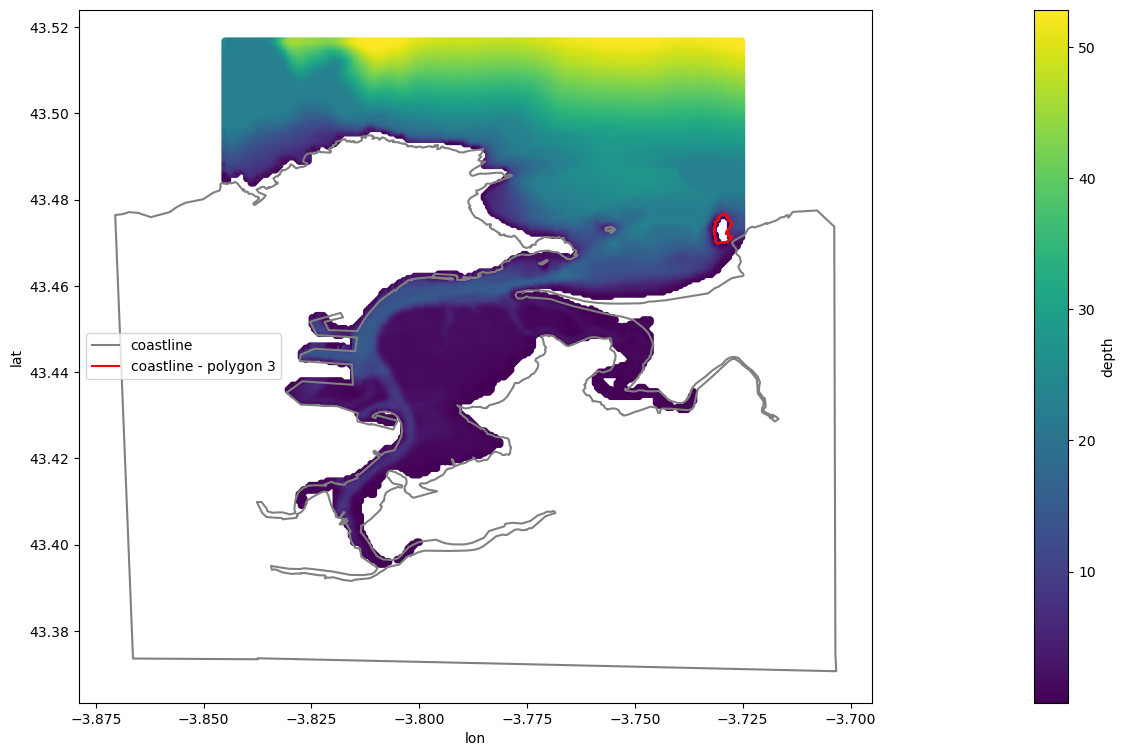

In [6]:
from matplotlib import pyplot as plt

ax = grid.plot.scatter(x="lon", y="lat", c="depth", figsize=(16, 9))
# plt.fill(coast["lon"], coast["lat"], color="grey")
coast.plot.line(ax=ax, x="lon", y="lat", color="grey", label="coastline")
coast.loc[[i]].plot.line(
    ax=ax, x="lon", y="lat", color="r", label=f"coastline - polygon {i}"
)
ax.axis("scaled")